# Predicting the price of used cars

In a world where AI and basic code can help you automate systems, reflect data patterns, and even create meaningful web content, it promises to be a useful tool for companies of any size. 
Do you like to reminisce on memories with old friends? Most likely YES! Growing up, we all wanted to own a car someday(new or old) because it felt as a rite of passage.Buying a car especially a new one, don't come cheap.Due to the cost implication, majority tend to go for the second choice which is used car market. In the process of buying or selling that car, you can either pay too much or sell less than it's market value.

In this project we are going to predict the price of used cars using machine learning techniques. The dataset can be downloaded from Kaggle. link below >>>
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho


In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

# Loading the data

In [2]:
# reading our CSV file which we downloaded
df = pd.read_csv("Data/used_car.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Data Preprocessing

In [3]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [4]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers as the values are gradually increasing!
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
90%,2018.000000,9.000000e+05,120000.000000
95%,2019.000000,1.300000e+06,140000.000000
99%,2020.000000,3.200000e+06,220000.000000


In [5]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
# checking missing value
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [8]:
# convert the ' Owner' column to numeric values
df.owner = df.owner.replace({'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4, 'Test Drive Car':0})
df.owner =  df.owner.astype('int')

In [9]:
df.owner.unique()

array([1, 2, 4, 3, 0])

In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2


In [11]:
# Creating a new feature called total no. of years old my car. It's important to know how many years old the car is.
df['car_age'] = 2022-df['year']

#It's time to drop the Year column after the needed info is derived.
df.drop(labels='year',axis=1,inplace=True)

In [12]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,1,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,1,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,1,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,1,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,2,8


# EDA

Text(0.5, 1.0, 'Selling Price Vs Fuel Type')

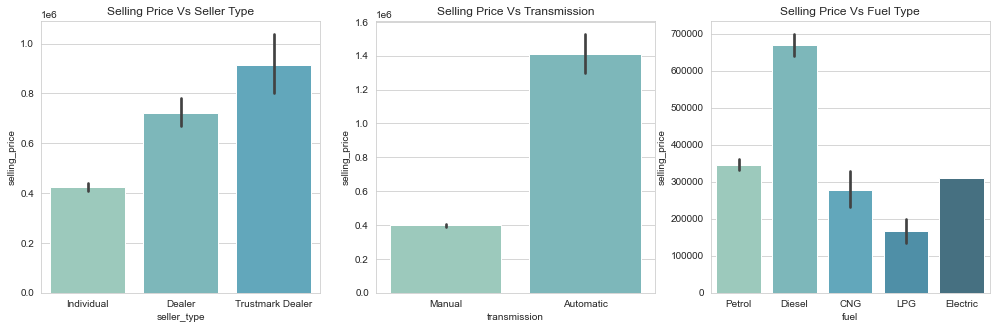

In [13]:
#Seller Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x = 'seller_type',
            y = 'selling_price',
            data = df)
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(x = 'transmission',
            y = 'selling_price',
            data = df)
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(x = 'fuel',
            y = 'selling_price',
            data = df)
plt.title('Selling Price Vs Fuel Type')

1. Selling Price of cars seems to have higher prices when sold by Trustmark Dealers when compared to Individuals
2. It can be observed that Selling Price would be higher for cars that are Automatic.
3. Selling Price of cars with Fuel Type of Diesel is higher than Petrol, CNG, LPG and 


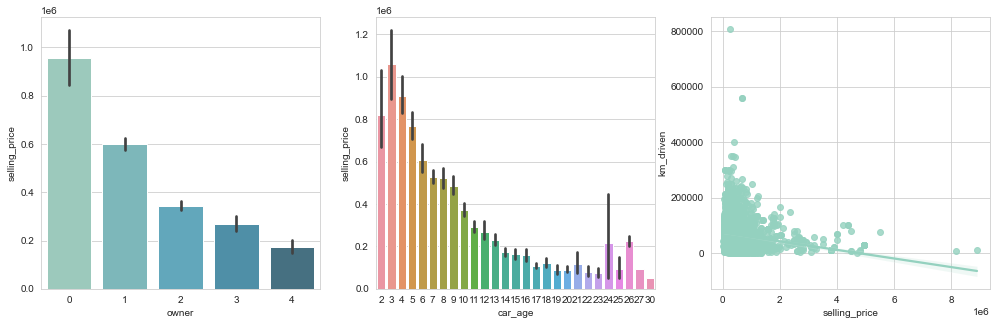

In [14]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x = 'owner',
            y = 'selling_price',
            data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'car_age',
            y = 'selling_price',
            data = df)

plt.subplot(1,3,3)
sns.regplot(x = 'selling_price',
            y = 'km_driven',
            data = df)
plt.show()

1. Selling Price is high with less Owners used Cars *
2. Selling Price of cars 2 years old would be high and gradually decreases with car of 17 years old *
3. Lesser the Kms driven higher the Selling Price *

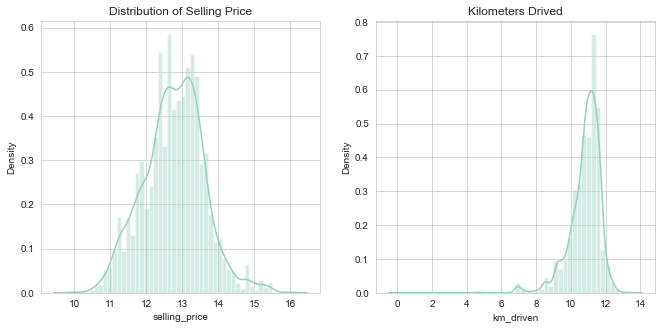

In [15]:
plt.figure(figsize=[17,5])

plt.subplot(1,3,2)
sns.distplot(np.log(df['selling_price']))
plt.title('Distribution of Selling Price')


plt.subplot(1,3,3)
sns.distplot(np.log(df['km_driven']))
plt.title('Distribution of KMS Drived')


plt.title('Kilometers Drived')
plt.show()

In [16]:
# Here's our categorical column
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['name'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


In [20]:
# In Car Name column There are three hundred and twelve unique name. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
df = df.drop(labels='name', axis=1)

In [21]:
# Dealing With Categorical Variables, creagting dummie
df2 = pd.get_dummies(df,drop_first=True)
df2.head()

,selling_price,km_driven,owner,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,60000,70000,1,15,0,0,0,1,1,0,1
1,135000,50000,1,15,0,0,0,1,1,0,1
2,600000,100000,1,10,1,0,0,0,1,0,1
3,250000,46000,1,5,0,0,0,1,1,0,1
4,450000,141000,2,8,1,0,0,0,1,0,1


In [18]:
df.name.unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)